In [1]:
import pandas as pd

In [2]:
milk = pd.read_csv('../Data/monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [3]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [4]:
milk.plot()

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

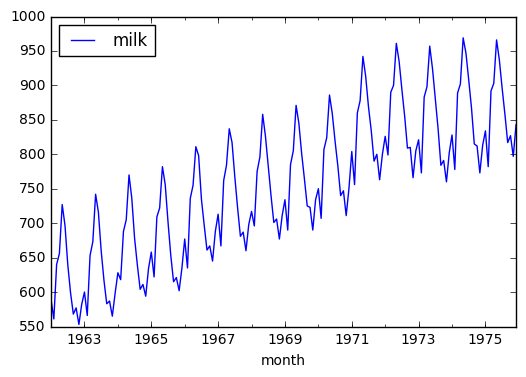

In [7]:
milk.plot()

In [8]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(milk.values.reshape(168,))

(-1.303811587422125,
 0.62742670860303362,
 13L,
 154L,
 {'1%': -3.4735425281962091,
  '10%': -2.5768780536346769,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [9]:
milk['avg'] = milk.milk/milk.index.days_in_month.astype(float)

In [10]:
milk.head()

,milk,avg
month,,
1962-01-01,589,19.000000
1962-02-01,561,20.035714
1962-03-01,640,20.645161
1962-04-01,656,21.866667
1962-05-01,727,23.451613


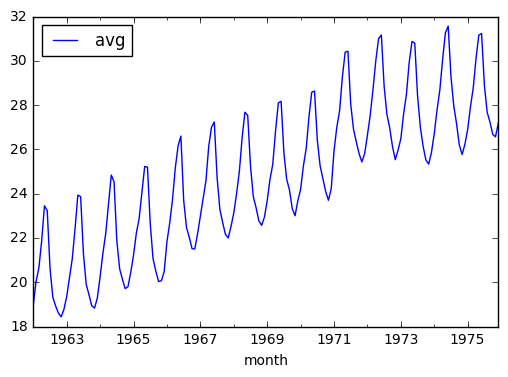

In [11]:
milk.plot(x=milk.index, y = 'avg')

In [22]:
milk.avg.sum()

4166.326661899464

In [12]:
milk['new_avg'] = milk.avg - milk.avg.shift(12)

In [15]:
import numpy as np
sm.tsa.stattools.adfuller(milk.dropna().new_avg.values.reshape(np.newaxis,))

(-2.1594860932888071,
 0.221276726588304,
 12L,
 143L,
 {'1%': -3.4769274060112707,
  '10%': -2.5776654080884152,
  '5%': -2.8819726324025625},
 -25.225679141303317)

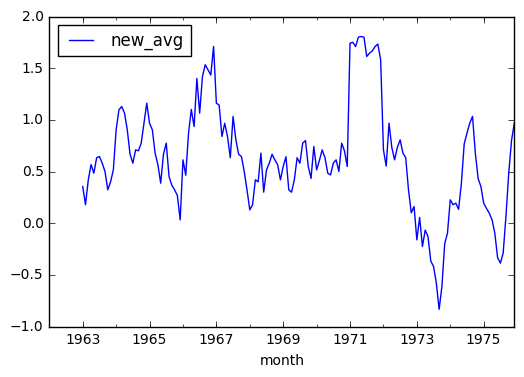

In [16]:
milk.plot(x=milk.index, y = 'new_avg')

In [17]:
milk['new_avg'] = milk.new_avg - milk.new_avg.shift(1)

In [18]:
sm.tsa.stattools.adfuller(milk.dropna().new_avg.values.reshape(np.newaxis,))

(-5.4813263347969272,
 2.2808455518037347e-06,
 11L,
 143L,
 {'1%': -3.4769274060112707,
  '10%': -2.5776654080884152,
  '5%': -2.8819726324025625},
 -20.90513750989237)

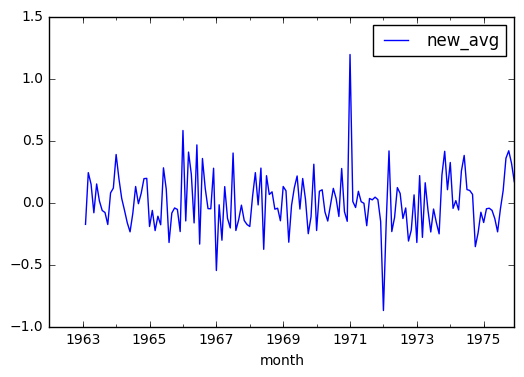

In [19]:
milk.plot(x=milk.index, y = 'new_avg')

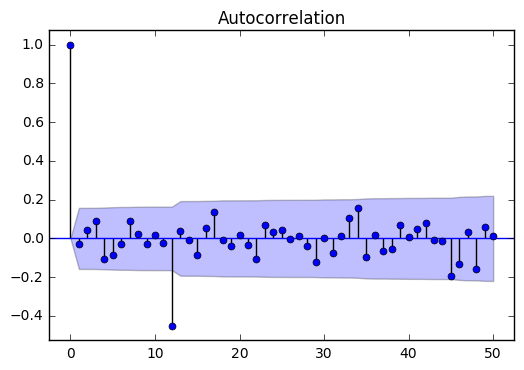

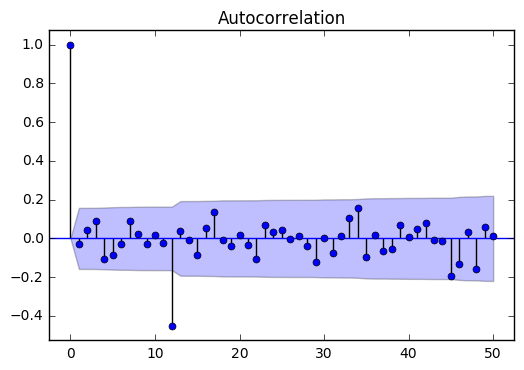

In [20]:
sm.graphics.tsa.plot_acf(milk.dropna().new_avg.values.squeeze(), lags=50)

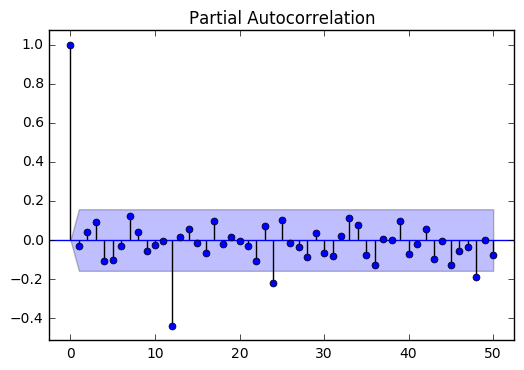

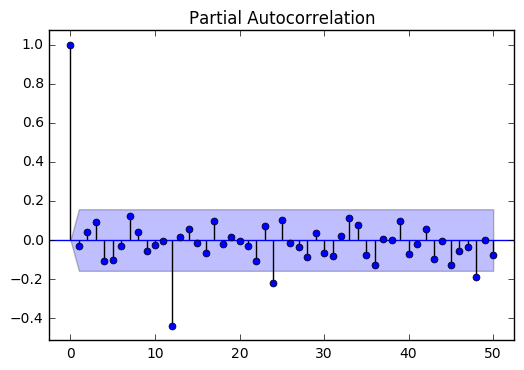

In [21]:
sm.graphics.tsa.plot_pacf(milk.dropna().new_avg.values.squeeze(), lags=50)